In [1]:
import sys
import os
import pickle
sys.path.append("/root/autodl-tmp/HSPS/IFC/")

# pkl
path = '/root/autodl-tmp/HSPS/IFC/Checkpoints/IFC_CNN_N_10.pkl'

In [2]:

# load
with open(path, 'rb') as file:
    loaded_object = pickle.load(file)



In [6]:
model = loaded_object.model
loaded_object.prepare_dataset(npz_path= loaded_object.config["Data_In"]["path"])

In [7]:
dataloader = loaded_object.test_loader

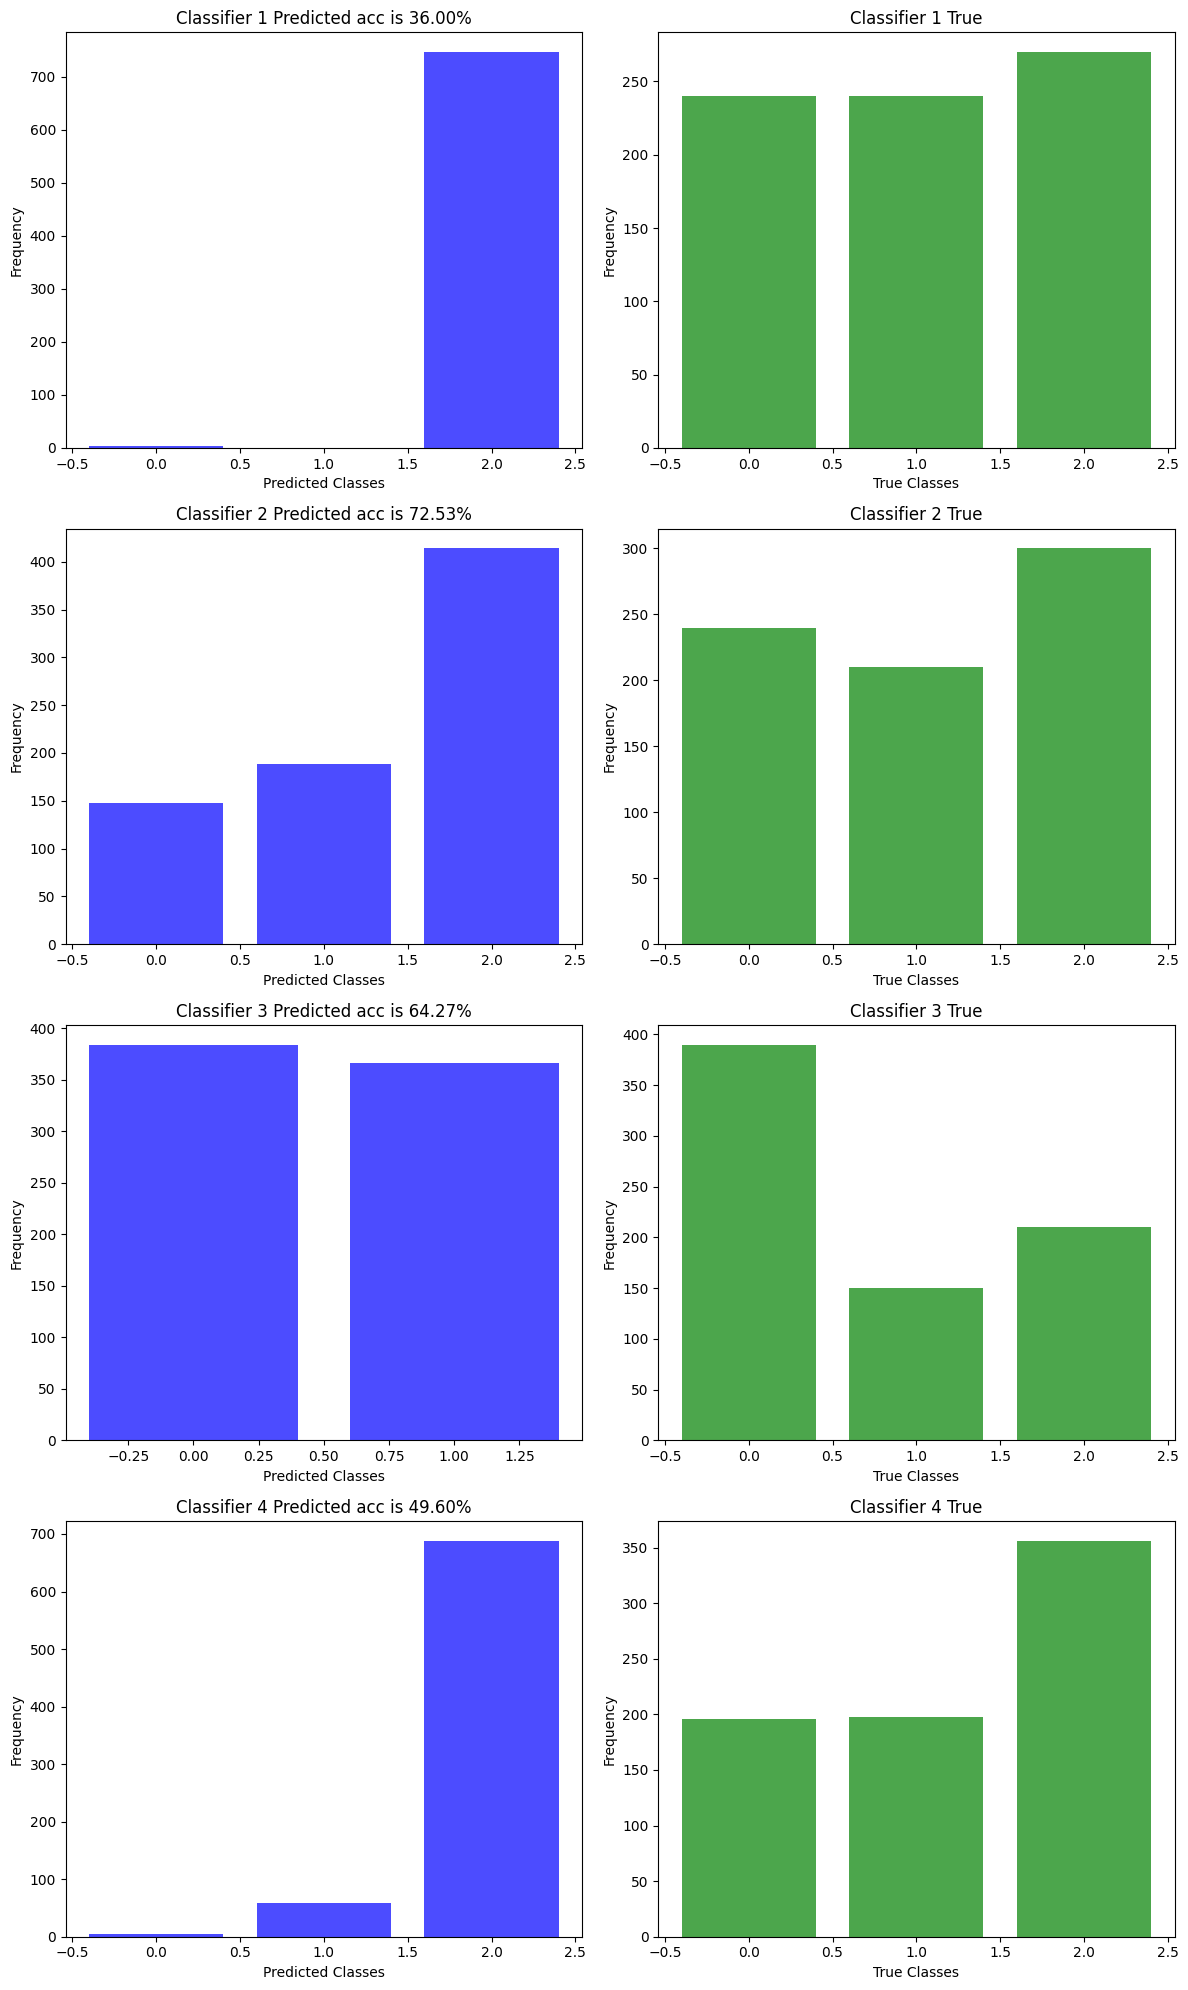

In [8]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import TSNE

# 假设dataloader、model已经定义
predictions = [[] for _ in range(4)]  # 为每个分类器预先创建列表
true_labels_list = [[] for _ in range(4)]  # 修改变量名以避免冲突

for mc in range(30):
    for data, conditions, label in dataloader:
        data = data.cuda()
        outputs = model(data)
        latent = model.latent  # [b, 512]

        for i in range(4):  # calssifer -4 
            _, predicted = torch.max(outputs[:, i, :], 1)  # 获取最大值的索引作为预测类别
            predictions[i].extend(predicted.cpu().numpy())
            true_labels_list[i].extend(label[:, i].cpu().numpy())

# 绘制每个分类器的预测结果的柱状图
num_classifiers = len(predictions)
fig, axes = plt.subplots(num_classifiers, 2, figsize=(12, num_classifiers * 5))  # 增加图的宽度以更好地展示

for i in range(num_classifiers):
    ax_pred = axes[i, 0]
    ax_true = axes[i, 1]
 
    # 预测结果的柱状图
    pred_labels, pred_counts = np.unique(predictions[i], return_counts=True)
    ax_pred.bar(pred_labels, pred_counts, color='blue', alpha=0.7)
    
    ax_pred.set_xlabel('Predicted Classes')
    ax_pred.set_ylabel('Frequency')

    # 真实标签的柱状图
    true_labels, true_counts = np.unique(true_labels_list[i], return_counts=True)
    ax_true.bar(true_labels, true_counts, color='green', alpha=0.7)
    ax_true.set_title(f'Classifier {i+1} True')
    ax_true.set_xlabel('True Classes')
    ax_true.set_ylabel('Frequency')
    #将列表转换为NumPy数组以便更容易地进行运算
    preds = np.array(predictions[i])
    labels = np.array(true_labels_list[i])
    
    # 计算准确率
    
    accuracy = np.mean(preds == labels) * 100
    ax_pred.set_title(f'Classifier {i+1} Predicted acc is {accuracy:.2f}%')
plt.tight_layout()
plt.show()


In [7]:
import numpy as np

# 假设 predictions 和 true_labels 都是包含四个元素的列表，每个元素都是一个分类器的预测/真实标签列表
accuracies = []

for i in range(4):  # 对于每个分类器
    # 将列表转换为NumPy数组以便更容易地进行运算
    preds = np.array(predictions[i])
    labels = np.array(true_labels_list[i])
    
    # 计算准确率
    accuracy = np.mean(preds == labels)
    accuracies.append(accuracy)
    
    # 打印每个分类器的准确率
    print(f'Classifier {i+1} Accuracy: {accuracy:.2f}')


Classifier 1 Accuracy: 0.27
Classifier 2 Accuracy: 0.99
Classifier 3 Accuracy: 1.00
Classifier 4 Accuracy: 0.65
